## Theoretical Period vs. Angle Plot of a Simple Pendulum

Assume a constant spring length and no dissipation.

The differential equation of the spring is: $\ddot{\theta} = -\frac{g}{l}\sin(\theta)$.

At $t=0$, $\theta=\theta_0$, $\dot{\theta}=0$.

In [1]:
from math import *
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

g = 9.80665  # in m/s²
l = 0.34  # length of the string in m

#### Theoretical period with small-angle approximation

When $\theta$ is small, $\sin(\theta)\sim\theta$.

The differential equation becomes $\frac{d^2\theta}{dt^2}=-\frac{g}{l}\theta$.

Let $p(\theta)=\frac{d\theta}{dt}$, then $\frac{d^2\theta}{dt^2}=\frac{dp}{dt}=\frac{dp}{d\theta}\frac{d\theta}{dt}$. the equation becomes $p\frac{dp}{d\theta}=-\frac{g}{l}\theta$.

$p\mathrm{d}p=-\frac{g}{l}\theta\mathrm{d}\theta$. $\int_0^p p\mathrm{d}p=\int_{\theta_0}^\theta-\frac{g}{l}\theta\mathrm{d}\theta$. $\frac{1}{2}p^2=\frac{g}{2l}(\theta_0^2-\theta^2)$.

$\frac{d\theta}{dt}=\sqrt{\frac{g}{l}(\theta_0^2-\theta^2)}$. $\int_{\theta_0}^{\theta}\frac{\mathrm{d}\theta}{\sqrt{\theta_0^2-\theta^2}}=\int_0^t\sqrt{\frac{g}{l}}\mathrm{d}t$. $-\cos^{-1}\left(\frac{\theta}{\theta_0}\right)=\sqrt{\frac{g}{l}}t$. $\theta(t)=\theta_0\cos\left(\sqrt{\frac{g}{l}}t\right)$.

The period of the pendulum is $T=2\pi\sqrt{\frac{l}{g}}$.

In [2]:
theo_T = 2.0*pi*sqrt(l/g)
print("Theoretical period: {:.3f} s".format(theo_T))

Theoretical period: 1.170 s


#### Actual period - Solve the ODE numerically?

For different $0\lt\theta_0\le\frac{\pi}{2}$, Call `scipy.integrate.odeint` to find the solution to the differential equation at fixed t-values.

Then, find the first local maximum of the angle. Apply quadratic interpolation to find the time.

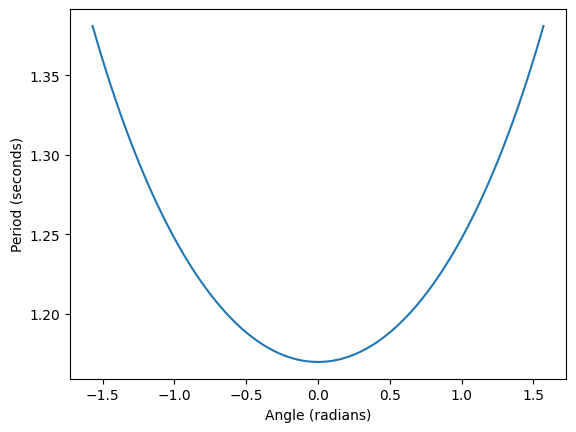

In [3]:
list_angle = np.linspace(-pi/2, pi/2, 100)
list_period = []

def func(u, t):
    theta, theta_t = u[0], u[1]
    theta_tt = -g/l*sin(theta)
    return [theta_t, theta_tt]

for theta0 in list_angle:
    ts = np.linspace(0, 4.0*theo_T, 200)
    xs = odeint(func, [theta0, 0], ts)[:, 0]
    #plt.plot(ts, xs);plt.show()
    for i in range(1, len(ts)-1):
        if (xs[i] - xs[i-1]) * (xs[i] - xs[i+1]) > 0:
            # quadratic fit
            a, b, c = np.polyfit(ts[i-1:i+2], xs[i-1:i+2], 2)
            t = -b/(2*a)
            list_period.append(2.0*t)
            break
assert len(list_angle) == len(list_period)

plt.plot(list_angle, list_period)
plt.xlabel("Angle (radians)")
plt.ylabel("Period (seconds)")
plt.show()


#### Fit the data to a model

Fit the period-angle relationship to a quadratic regression model.

[a, b, c] = [0.0836356038136672, -5.041981190482685e-15, 1.1671467807992033]


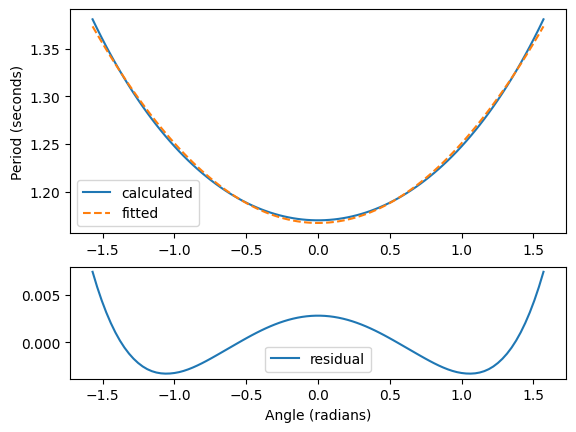

In [4]:
a, b, c = np.polyfit(list_angle, list_period, 2)
print("[a, b, c] =", [a, b, c])

predicted = (a * list_angle + b) * list_angle + c
residual = list_period - predicted

fig, (ax1, ax2) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [2, 1]})

ax1.set_ylabel("Period (seconds)")
ax1.plot(list_angle, list_period)
ax1.plot(list_angle, predicted, "--")
ax1.legend(["calculated", "fitted"])

ax2.set_xlabel("Angle (radians)")
ax2.plot(list_angle, residual)
ax2.legend(["residual"])

plt.show()